In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

California housing dataset
--------------------------

**Dataset characteristics:**

    :Number of instances: 20640

    :Number of attributes: eight numeric, predictive attributes and the target

    :Attribute information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing attribute values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

It can be downloaded/loaded by using the
:func:`sklearn.datasets.fetch_california_housing` function.

.. topic:: References

    - Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
      Statistics and Probability Letters, 33 (1997) 291-297

In [37]:
# Load dataset
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)

In [38]:
med_inc = np.array([row[0] for row in X]).reshape(-1, 1)

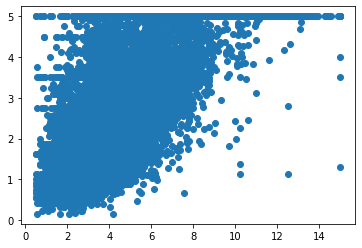

In [39]:
# Plot the data.

plt.scatter(med_inc, y)

In [40]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [41]:
# Fit the model to the data. 
# Note: This is the training step, where you fit the line to the data.

model.fit(med_inc, y)

LinearRegression()

In [42]:
# Print the coefficient and the intercept for the model.

print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [0.41793849]
y-axis intercept:  0.4508557670326794


In [43]:
# Note: We have to transform our min and max values 
# so they are in the format of array([[0.4999]]).
# This is the required format for `model.predict()`.

x_min = np.array([[med_inc.min()]])
x_max = np.array([[med_inc.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[0.4999]]
Max X Value: [[15.0001]]


In [44]:
# Calculate the y_min and y_max by using model.predict and x_min and x_max.

y_min = model.predict(x_min)
y_max = model.predict(x_max)
print(f"Predicted Min Value: {y_min}")
print(f"Predicted Max Value: {y_max}")

Predicted Min Value: [0.65978322]
Predicted Max Value: [6.71997494]


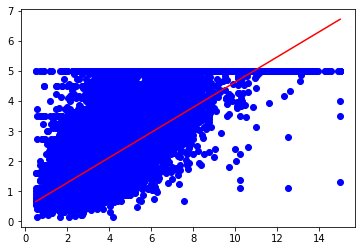

In [45]:
# Plot X and y by using plt.scatter.
# Plot the model fit line by using [x_min[0], x_max[0]], [y_min[0], y_max[0]].

plt.scatter(med_inc, y, c="blue")
plt.plot([x_min[0][0], x_max[0][0]], [y_min[0], y_max[0]], c='red')

## Multiple Linear Regression

In [30]:
# Use train_test_split to create the training and testing data.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [31]:
# Create the model by using LinearRegression.

model2 = LinearRegression()

In [35]:
# Fit the model to the training data, and calculate the scores for the training and testing data.

model2.fit(X_train, y_train)
training_score = model2.score(X_train, y_train)
testing_score = model2.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.609873031052925
Testing Score: 0.5910509795491352


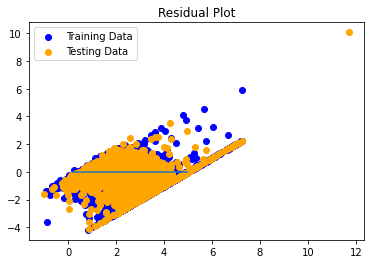

In [36]:
# Plot the residuals for the training and testing data.

plt.scatter(model2.predict(X_train), model2.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model2.predict(X_test), model2.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()